## **Importing libraries and loading the Data**



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier


# load the data into a df
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

## Data Exploration


In [ ]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_data.describe()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.361582,0.523008,0.381594,32.204208,0.361392
std,257.353842,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,0.635673
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [ ]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#total null values for each feature
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Vizualizing the data

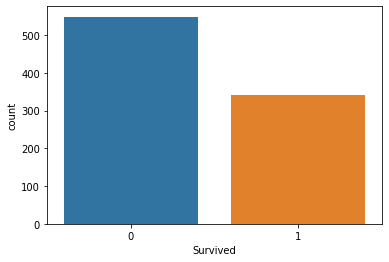

In [ ]:
# visualizing target variable
sns.countplot(x='Survived', data=train_data)
plt.show()

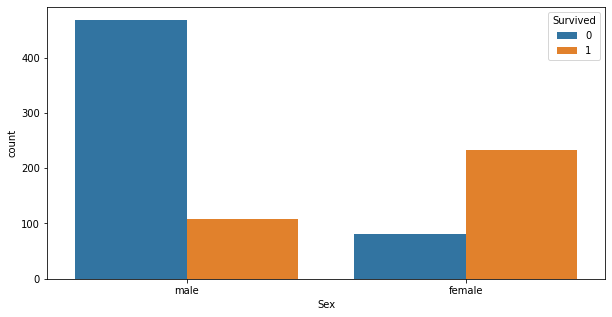

In [ ]:
# comparing target variable with sex variable
plt.figure(figsize=[10,5])
sns.countplot(x='Sex', hue='Survived', data=train_data)
plt.show()

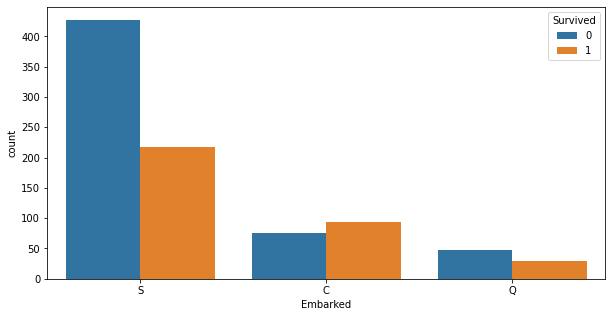

In [ ]:
# comparing target variable with embarked variable
plt.figure(figsize=[10,5])
sns.countplot(x='Embarked', hue='Survived', data=train_data)
plt.show()

In [ ]:
# Correlation matrix
correlation = train_data.corr()
print(correlation)

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


In [ ]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# null values in test data
test_data.isnull().sum()


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
train_data.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

# Feature Engineering and Preprocessing

In [ ]:
# filling train data with the median values
train_data["Age"] = train_data["Age"].fillna(train_data["Age"].dropna().median())
train_data['Embarked'] = train_data['Embarked'].fillna('S')
train_data["Fare"] = train_data["Fare"].fillna(train_data["Fare"].dropna().median())

# this maps the given values respectively
train_data.Sex =train_data.Sex.map({"male" : 0 , "female": 1})
train_data.Embarked =train_data.Embarked.map({"S" : 0 , "C": 1,"Q":2})

# the features which provide the best accuracy
features_extracted = ["Pclass", "Age" , "Fare", "Sex","Embarked"]

# x_train
x_train = train_data[features_extracted].values

# target variable
y_train = train_data["Survived"].values



## Applying Models

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier


#Applying models to check which one we should choose

# KNN for K = 1,5,10
# knn 1
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(x_train, y_train)
y_pred1 = knn1.predict(x_train)
score1 = knn1.score(x_train, y_train)
print('Accuracy for KNN = 1', score1)

# knn5
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(x_train, y_train)
y_pred2 = knn5.predict(x_train)
score2 = knn5.score(x_train, y_train)
print('Accuracy for KNN = 5', score2)

# KNN 10
knn10 = KNeighborsClassifier(n_neighbors=10)
knn10.fit(x_train, y_train)
y_pred3 = knn10.predict(x_train)
score3 = knn10.score(x_train, y_train)
print('Accuracy for KNN = 10',score3)

# using logistic regression with higher iterations
logreg = LogisticRegression(max_iter=1000, solver='lbfgs')
logreg.fit(x_train, y_train)
y_pred4 = logreg.predict(x_train)
score4 = logreg.score(x_train, y_train)
print('Accuracy for Logistic Regression', score4)

# using random forest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train, y_train)
y_pred5 = rf.predict(x_train)
score5 = rf.score(x_train, y_train)
print('Accuracy for RF', score5)

# using XG Boost classifier
xgb = XGBClassifier(n_estimators=100, max_depth=10)
xgb.fit(x_train, y_train)
y_pred6 = xgb.predict(x_train)
score6 = xgb.score(x_train, y_train)
print('Accuracy for XGBClassifier', score6)

Accuracy for KNN = 1 0.9730639730639731
Accuracy for KNN = 5 0.8047138047138047
Accuracy for KNN = 10 0.7609427609427609
Accuracy for Logistic Regression 0.7912457912457912
Accuracy for RF 0.9775533108866442
Accuracy for XGBClassifier 0.9506172839506173


## Model Optimization

In [ ]:
# optimizing the best performing model

rfc = RandomForestClassifier(n_estimators=75,criterion = 'gini', random_state = 0,min_samples_split=5,max_depth=10,max_leaf_nodes =15, n_jobs=-1,oob_score=True)
rfc.fit(x_train, y_train)
score1 = rfc.score(x_train, y_train)
y_pred = rfc.predict(x_train)
print(score1)

0.8496071829405163


In [ ]:
# performing the same EDA and feature extraction for test data
test_data.Sex =test_data.Sex.map({"male" : 0 , "female": 1})

test_data["Age"] = test_data["Age"].fillna(train_data["Age"].dropna().median())

test_data["Fare"] = test_data["Fare"].fillna(train_data["Fare"].dropna().median())

test_data['Embarked'] = test_data['Embarked'].fillna('S')

test_data.Embarked =test_data.Embarked.map({"S" : 0 , "C": 1,"Q":2})

x_test = test_data[["Pclass", "Age" , "Fare", "Sex","Embarked"]].values


# Predicting on test data

In [ ]:
# predict x_test
prediction_rf = rfc.predict(x_test)

# Creating a submission file
submission = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': prediction_rf})
submission.to_csv('/content/drive/MyDrive/Data Mining and Machine Learning Assignment 1/submission9.csv', index=False)